Import and Inspect the Dataset

In [1]:
import pandas as pd

In [2]:
# Loading Dataset
df=pd.read_csv(r"C:\Users\user\OneDrive\Desktop\python programming\Amazon (1).csv")


In [3]:
df.shape

(100000, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

In [5]:
df.describe()

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.001400,302.905748,0.074226,68.468902,7.406660,918.256479
std,1.413548,171.840797,0.082583,74.131180,4.324057,724.508332
min,1.000000,5.000000,0.000000,0.000000,0.000000,4.270000
25%,2.000000,154.190000,0.000000,15.920000,3.680000,340.890000
50%,3.000000,303.070000,0.050000,45.250000,7.300000,714.315000
75%,4.000000,451.500000,0.100000,96.060000,11.150000,1349.765000
max,5.000000,599.990000,0.300000,538.460000,15.000000,3534.980000


In [6]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [7]:
df.nunique()

OrderID          100000
OrderDate          1825
CustomerID        43233
CustomerName        200
ProductID            50
ProductName          50
Category              6
Brand                10
Quantity              5
UnitPrice         48433
Discount              7
Tax               23002
ShippingCost       1501
TotalAmount       79208
PaymentMethod         6
OrderStatus           5
City                 20
State                13
Country               5
SellerID           1999
dtype: int64

In [8]:
df.isnull().sum().sum() # No Null Data Found

0

In [9]:
# Convert date column to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

In [10]:
print(df['OrderDate'].dtype)          # Should show: datetime64[ns]
print(df['OrderDate'].head())

datetime64[ns]
0   2023-01-31
1   2023-12-30
2   2022-05-10
3   2023-07-18
4   2023-02-04
Name: OrderDate, dtype: datetime64[ns]


In [11]:
# Check how many failed
n_failed = df['OrderDate'].isna().sum()
print(f"{n_failed} dates could not be parsed ({n_failed/len(df):.2%})") 

0 dates could not be parsed (0.00%)


In [12]:
# Ensuring numeric columns are of correct types
numeric_cols = ['Quantity', 'UnitPrice', 'Discount', 'Tax', 'ShippingCost', 'TotalAmount']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [13]:
# Clean categorical columns (strip whitespace, unify capitalization)
cat_cols = ['Category', 'Brand', 'PaymentMethod', 'OrderStatus', 'City', 'State', 'Country']
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip().str.title())

In [14]:
# Remove duplicates
df = df.drop_duplicates()

In [15]:
# Feature engineering – extract date components
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month_name()
df['Quarter'] = df['OrderDate'].dt.to_period('Q')

In [16]:
# Filter out cancelled orders for visualization
df_clean = df[df['OrderStatus'] == 'Delivered']

In [17]:
# 8. Reset index
df_clean = df_clean.reset_index(drop=True)

In [18]:
# 9. Saving Clean Dataset for Dashboard Use
df_clean.to_csv("Amazon_Cleaned.csv", index= False)         # index=False — prevents pandas from writing row numbers as a separate column.

In [19]:
df_clean.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID,Year,Month,Quarter
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,Brightlux,3,106.59,...,319.86,Debit Card,Delivered,Washington,Dc,India,SELL01967,2023,January,2023Q1
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,Urbanstyle,1,251.37,...,259.64,Amazon Pay,Delivered,Fort Worth,Tx,United States,SELL01298,2023,December,2023Q4
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,Urbanstyle,3,35.03,...,108.06,Debit Card,Delivered,Austin,Tx,United States,SELL00908,2022,May,2022Q2
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,159.66,Cash On Delivery,Delivered,Charlotte,Nc,India,SELL01164,2023,July,2023Q3
4,ORD0000006,2022-12-31,CUST042705,Karan Sharma,P00023,Cookware Set,Books,Readmore,4,449.73,...,2017.53,Upi,Delivered,Los Angeles,Ca,United States,SELL01494,2022,December,2022Q4


Line Chart: for displaying the monthly sales trend

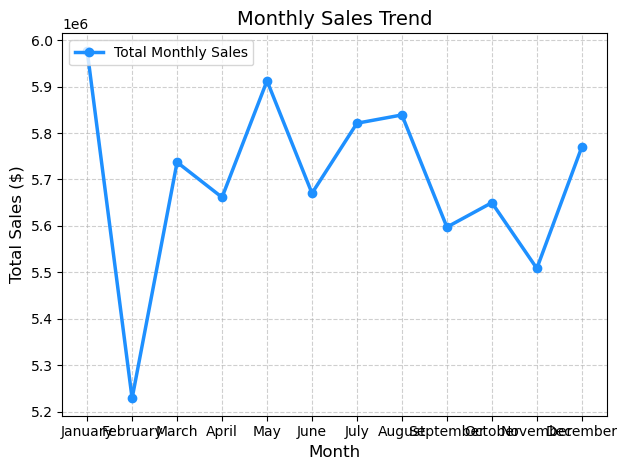

In [20]:
import matplotlib.pyplot as plt

# Grouping sales by month
monthly_sales= df_clean.groupby('Month')['TotalAmount'].sum()

# Ensuring month order
month_order= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_sales= monthly_sales.reindex(month_order)

# Line Chart Plot
plt.Figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color= 'dodgerblue', linewidth= 2.5, label= 'Total Monthly Sales')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Monthly Sales Trend', fontsize=14)
plt.legend(loc= 'upper left')
plt.grid(True, linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

Bar Chart Highlighting the Top 3 Product Categories

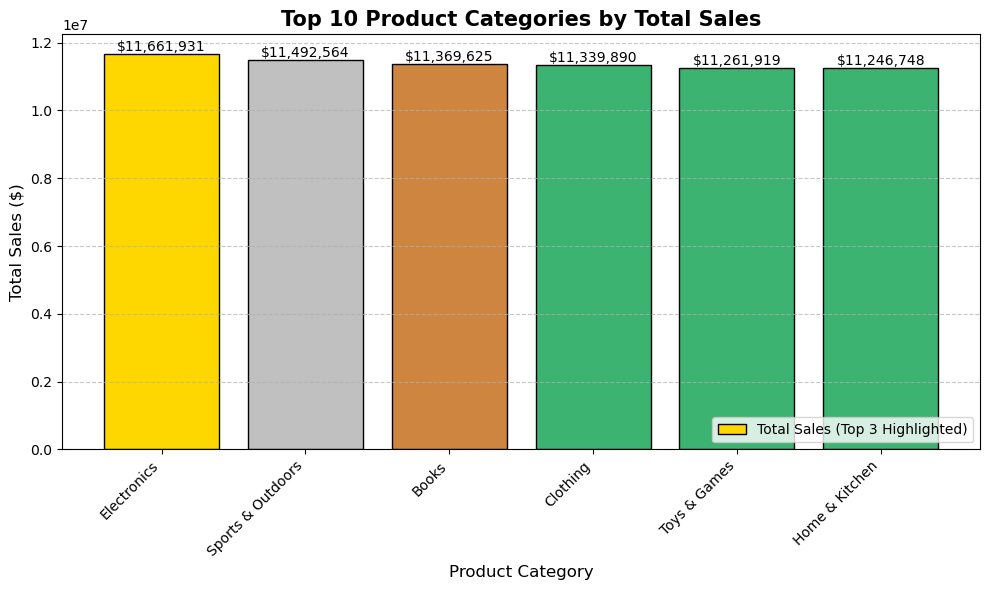

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Aggregate total sales by category
category_sales = (
    df_clean.groupby('Category')['TotalAmount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Step 2: Assign colors — top 3 highlighted
colors = ['gold', 'silver', 'peru'] + ['mediumseagreen'] * (len(category_sales) - 3)

# Step 3: Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(
    category_sales.index,
    category_sales.values,
    color=colors,
    edgecolor='black'
)

# Step 4: Add title, labels, and grid
plt.title('Top 10 Product Categories by Total Sales', fontsize=15, weight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 5: Add legend
plt.legend(['Total Sales (Top 3 Highlighted)'], loc='lower right')

# Step 6: Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'${height:,.0f}',           # Format with commas and dollar sign
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()





Pie Chart: Distribution of Payment Methods (Value & Percentage)

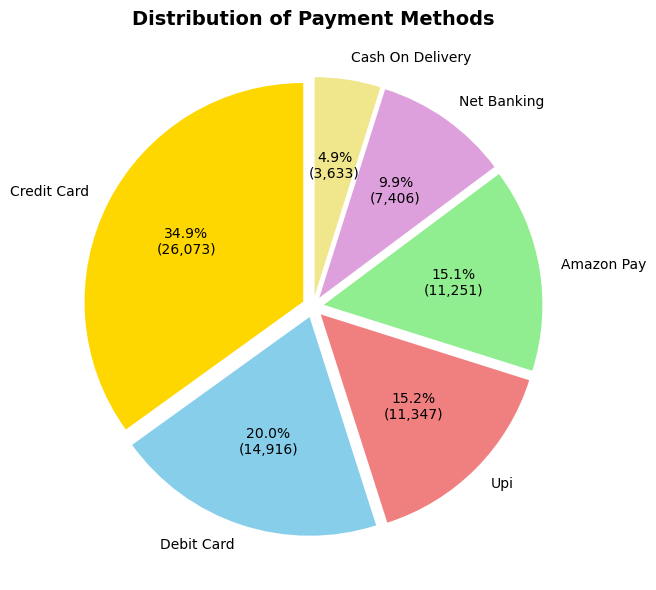

In [22]:
import matplotlib.pyplot as plt

# Step 1: Count payment method occurrences
payment_counts = df_clean['PaymentMethod'].value_counts()

# Step 2: Define colors (custom palette for visual balance)
colors = ['gold', 'skyblue', 'lightcoral', 'lightgreen', 'plum', 'khaki']

# Step 3: Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    payment_counts,
    labels=payment_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(payment_counts)/100):,})',     # this will display the result as Credit Card 42.3% (12,345)
    startangle=90,
    colors=colors[:len(payment_counts)],
    explode=[0.05] * len(payment_counts)
)

# Step 4: Add title
plt.title('Distribution of Payment Methods', fontsize=14, weight='bold')

# Step 5: Display pie chart
plt.tight_layout()
plt.show()


Horizontal Bar Graph: Geographic Visualization

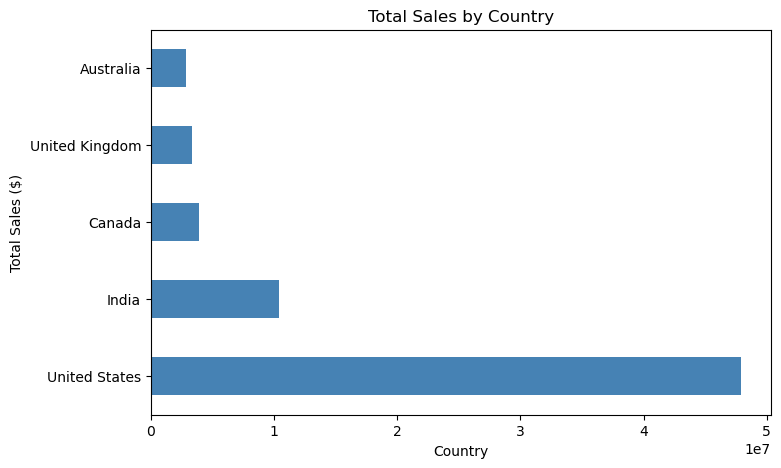

In [23]:
geo_sales = df_clean.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)
geo_sales.plot(kind='barh', figsize=(8,5), color='steelblue', title='Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales ($)')
plt.show()